# Regular Programming vs Machine Learning

In regular programming we process inputs and transform them to obtain outputs. For example, if I want to convert Celsius degrees to Fahrenheit degrees, I can implement the formula:

Fahrenheit = Celsius * 1.8 + 32

Then, for any value of temperature in Celsius degree, I can obtain Fahrenheit degrees.

In [1]:
def celsius_to_fahrenheit(v):
    return v * 1.8 + 32

celsius_to_fahrenheit(42)

107.60000000000001

Now, in machine learning we do not know the formula or algorithm or transformation that transforms one value into the other. All we have is examples of inputs and corresponding outputs

In [3]:
data = [
    (-40, -40.0),
    (-10, 14.0),
    (0, 32.0),
    (8, 46.4),
    (15, 59.0),
    (22, 71.6),
    (38, 100.4)
]

Lets solve this by training a neural network with Tensorflow, a library created by Google for Neural Networks.

In [4]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf
import numpy as np

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    tf.config.experimental.set_memory_growth(gpus[0], True)
    print('GPU', tf.test.gpu_device_name(), 'configured')

GPU /device:GPU:0 configured


In [5]:
celsius = np.array([d[0] for d in data], dtype=float)
fahrenheit = np.array([d[1] for d in data], dtype=float)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [8]:
print('Starting training...')
history = model.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print('Training finished')

Starting training...
Training finished


Lets take a look to how well is the network doing on each epoch

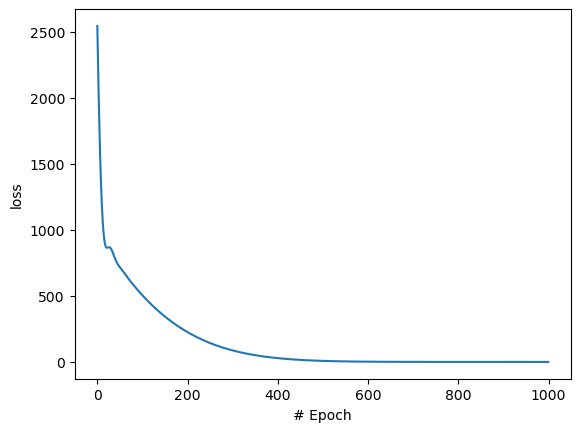

In [9]:
import matplotlib.pyplot as plt
plt.xlabel('# Epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'])
plt.show()

Now, lets make some predictions

In [10]:
result = model.predict([100.0])
print(result)

1/1 [==============================] - 0s 43ms/step
[[211.99591]]


In [11]:
celsius_to_fahrenheit(100)

212.0

Lets find the errors with some random celsius values

In [12]:
celsius_test = np.random.randint(-30, 150, (12))
celsius_test

array([104,  13, -12,  76,   3, -11,  55, 116,  92,  84, 104, 124])

In [13]:
fahrenheit_test = [celsius_to_fahrenheit(c) for c in celsius_test]
print(fahrenheit_test)

[219.20000000000002, 55.400000000000006, 10.399999999999999, 168.8, 37.4, 12.2, 131.0, 240.8, 197.6, 183.20000000000002, 219.20000000000002, 255.20000000000002]


In [14]:
inferred_fahrenheit = model.predict(celsius_test)
print(inferred_fahrenheit)

1/1 [==============================] - 0s 26ms/step
[[219.19685 ]
 [ 55.37552 ]
 [ 10.369659]
 [168.79028 ]
 [ 37.373177]
 [ 12.169895]
 [130.98537 ]
 [240.79967 ]
 [197.59404 ]
 [183.19217 ]
 [219.19685 ]
 [255.20154 ]]


In [15]:
mean_square_error = sum((real-inferr)**2 for real, inferr in zip(fahrenheit_test, inferred_fahrenheit))
mean_square_error

array([0.00357352], dtype=float32)

Lets see what the network learned so far:

In [16]:
model.layers[0].get_weights()

[array([[1.8002344]], dtype=float32), array([31.972473], dtype=float32)]

Compare it with the actual equation:

Fahrenheit = Celsius * 1.8 + 32

In conclusion, we manage to build a **model** that correctly maps between Celsius degrees to Fahrenheit degrees based only in examples.

**This machine learning task is knows as Regression and we use a Neural Network Model**

Lets see another example with a different task. We have some rules that allow us to classify the type of an animal based on some characteristics:

- Weight > 100 kg:
    - Yes: Hair?
        - Yes: Bear
        - No: Leave on water?
            - Yes: Whale
            - No: Anaconda
    - No: Fly?
        - Yes: Eagle
        - No: Cat

This is Biology, so if I have some animal description, I can automatically find which animal it is.

In [17]:
def get_animal(weight, hair, water, fly):
    if weight > 100:
        if hair:
            return "Bear"
        else:
            if water:
                return "Whale"
            else:
                return "Anaconda"
    else:
        if fly:
            return "Eagle"
        else:
            return "Cat"

In [18]:
get_animal(120, True, False, False)

'Bear'

In [19]:
get_animal(5, True, False, False)

'Cat'

The machile learning problem appears when I have some animal descriptions together with the current type of animal, and I want to create a model that, based on the descriptions, can infer the type of animal.

First, generate the data.

In [20]:
import random

def generate_random_animals(n):    
    result = []
    for _ in range(n):
        weight = random.randint(1, 200)
        hair = random.random() > 0.5
        water = random.random() > 0.5
        fly = random.random() > 0.5
        animal = get_animal(weight, hair, water, fly)
        result.append((weight, hair, water, fly, animal))
    return result    
        
for weight, hair, water, fly, animal in generate_random_animals(5):
    print(weight, hair, water, fly, "** Animal:",  animal)

199 False True True ** Animal: Whale
180 False True False ** Animal: Whale
189 True False False ** Animal: Bear
45 True False False ** Animal: Cat
76 True False True ** Animal: Eagle


In [21]:
data = generate_random_animals(1000)

In [22]:
data[:15]

[(168, False, False, False, 'Anaconda'),
 (171, True, False, True, 'Bear'),
 (156, False, True, False, 'Whale'),
 (114, False, True, False, 'Whale'),
 (102, False, False, True, 'Anaconda'),
 (186, True, False, False, 'Bear'),
 (95, True, False, False, 'Cat'),
 (128, False, True, True, 'Whale'),
 (136, True, True, False, 'Bear'),
 (129, True, True, True, 'Bear'),
 (186, True, True, False, 'Bear'),
 (26, False, True, True, 'Eagle'),
 (85, True, False, True, 'Eagle'),
 (109, False, False, True, 'Anaconda'),
 (150, True, False, True, 'Bear')]

In [23]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [24]:
df = pd.DataFrame(data, columns=['weight', 'hair', 'water', 'fly', 'animal'])
df.head(3)

,weight,hair,water,fly,animal
0,168,False,False,False,Anaconda
1,171,True,False,True,Bear
2,156,False,True,False,Whale


In [25]:
#split dataset in features and target variable
feature_cols = ['weight', 'hair', 'water', 'fly']
X = df[feature_cols] # Features
y = df.animal # Target variable

In [26]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [27]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [28]:
y_pred

array(['Whale', 'Eagle', 'Anaconda', 'Anaconda', 'Bear', 'Cat', 'Bear',
       'Whale', 'Cat', 'Eagle', 'Cat', 'Whale', 'Bear', 'Bear', 'Eagle',
       'Eagle', 'Eagle', 'Cat', 'Bear', 'Cat', 'Cat', 'Anaconda', 'Bear',
       'Whale', 'Cat', 'Cat', 'Cat', 'Whale', 'Anaconda', 'Cat', 'Cat',
       'Cat', 'Eagle', 'Bear', 'Whale', 'Cat', 'Bear', 'Whale',
       'Anaconda', 'Eagle', 'Bear', 'Anaconda', 'Bear', 'Bear', 'Bear',
       'Eagle', 'Whale', 'Eagle', 'Eagle', 'Cat', 'Anaconda', 'Anaconda',
       'Eagle', 'Eagle', 'Whale', 'Whale', 'Cat', 'Bear', 'Eagle', 'Bear',
       'Bear', 'Cat', 'Cat', 'Anaconda', 'Bear', 'Bear', 'Cat', 'Cat',
       'Cat', 'Cat', 'Anaconda', 'Anaconda', 'Whale', 'Eagle', 'Whale',
       'Cat', 'Bear', 'Cat', 'Bear', 'Bear', 'Eagle', 'Eagle', 'Anaconda',
       'Cat', 'Cat', 'Bear', 'Eagle', 'Bear', 'Cat', 'Eagle', 'Bear',
       'Anaconda', 'Eagle', 'Bear', 'Whale', 'Whale', 'Whale', 'Bear',
       'Eagle', 'Anaconda', 'Bear', 'Anaconda', 'Bear', 'Cat', 'E

In [29]:
[(r, p) for r, p in zip(y_test, y_pred)]

[('Whale', 'Whale'),
 ('Eagle', 'Eagle'),
 ('Anaconda', 'Anaconda'),
 ('Anaconda', 'Anaconda'),
 ('Bear', 'Bear'),
 ('Cat', 'Cat'),
 ('Bear', 'Bear'),
 ('Whale', 'Whale'),
 ('Cat', 'Cat'),
 ('Eagle', 'Eagle'),
 ('Cat', 'Cat'),
 ('Whale', 'Whale'),
 ('Bear', 'Bear'),
 ('Bear', 'Bear'),
 ('Eagle', 'Eagle'),
 ('Eagle', 'Eagle'),
 ('Eagle', 'Eagle'),
 ('Cat', 'Cat'),
 ('Bear', 'Bear'),
 ('Cat', 'Cat'),
 ('Cat', 'Cat'),
 ('Anaconda', 'Anaconda'),
 ('Bear', 'Bear'),
 ('Whale', 'Whale'),
 ('Cat', 'Cat'),
 ('Cat', 'Cat'),
 ('Cat', 'Cat'),
 ('Whale', 'Whale'),
 ('Anaconda', 'Anaconda'),
 ('Cat', 'Cat'),
 ('Cat', 'Cat'),
 ('Cat', 'Cat'),
 ('Eagle', 'Eagle'),
 ('Bear', 'Bear'),
 ('Whale', 'Whale'),
 ('Cat', 'Cat'),
 ('Bear', 'Bear'),
 ('Whale', 'Whale'),
 ('Anaconda', 'Anaconda'),
 ('Eagle', 'Eagle'),
 ('Bear', 'Bear'),
 ('Anaconda', 'Anaconda'),
 ('Bear', 'Bear'),
 ('Bear', 'Bear'),
 ('Bear', 'Bear'),
 ('Eagle', 'Eagle'),
 ('Whale', 'Whale'),
 ('Eagle', 'Eagle'),
 ('Eagle', 'Eagle'),
 ('Cat', 'C

In [30]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


Lets take a look to the model built

In [31]:
from sklearn import tree
text_representation = tree.export_text(clf, feature_names=['weight', 'hair', 'water', 'fly'])
print(text_representation)

|--- weight <= 100.50
|   |--- fly <= 0.50
|   |   |--- class: Cat
|   |--- fly >  0.50
|   |   |--- class: Eagle
|--- weight >  100.50
|   |--- hair <= 0.50
|   |   |--- water <= 0.50
|   |   |   |--- class: Anaconda
|   |   |--- water >  0.50
|   |   |   |--- class: Whale
|   |--- hair >  0.50
|   |   |--- class: Bear



**This machine learning task is known as suppervised classification**

Lets see another example. Here we are trying to estimate the correct number from its handwritten image 

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [33]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Display images

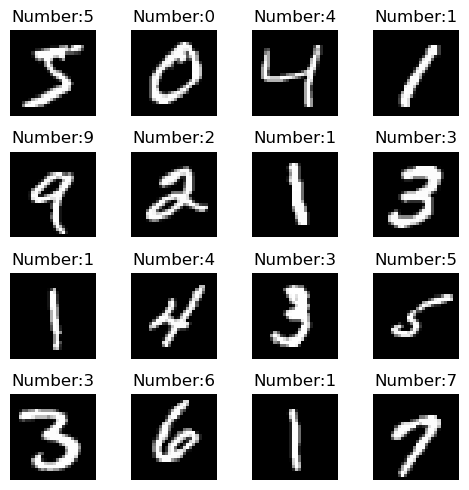

In [34]:
from IPython.display import display
import matplotlib.pyplot as plt


# Calculate the number of rows and columns for the grid
n_rows = 4
n_cols = 4

# Create a new figure with the desired grid size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5, 5))

# Iterate over the image files and display them in the grid
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i], cmap="gray")
    ax.set_title(f"Number:{y_train[i]}")
    ax.axis('off')

# Adjust the spacing and layout
plt.tight_layout()

# Display the figure
plt.show()

In [35]:
# Reshape and normalize the input data
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

In [36]:
# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
# Train the model
batch_size = 128
epochs = 10
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 3s 3ms/step - loss: 0.3909 - accuracy: 0.8896 - val_loss: 0.1911 - val_accuracy: 0.9429
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1691 - accuracy: 0.9507 - val_loss: 0.1423 - val_accuracy: 0.9570
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1251 - accuracy: 0.9629 - val_loss: 0.1184 - val_accuracy: 0.9628
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0996 - accuracy: 0.9703 - val_loss: 0.1082 - val_accuracy: 0.9658
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0821 - accuracy: 0.9751 - val_loss: 0.0926 - val_accuracy: 0.9723
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0709 - accuracy: 0.9787 - val_loss: 0.0865 - val_accuracy: 0.9737
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0599 - accuracy: 0.9820 - val_loss: 0.0883 - val_accuracy: 0.9743
Epoch 

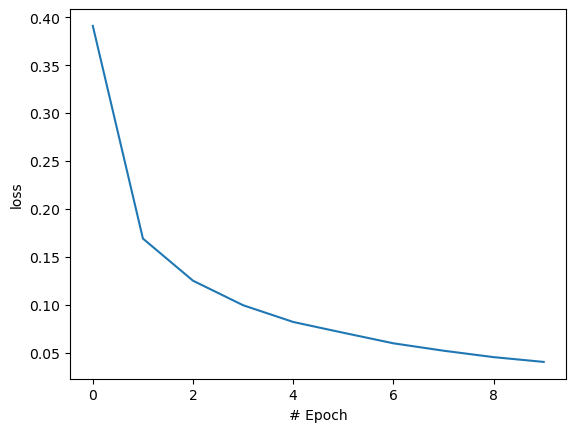

In [39]:
import matplotlib.pyplot as plt
plt.xlabel('# Epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'])
plt.show()

In [40]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0841 - accuracy: 0.9743
Test Loss: 0.0841
Test Accuracy: 0.9743


In [41]:
model.save('data/get_digit_ann.h5')

In [45]:
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *

width = 200  # canvas width
height = 200 # canvas height
center = height//2
white = (255, 255, 255) # canvas back

def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="black",width=10)
    draw.line([x1, y1, x2, y2],fill="black",width=10)
   
master = Tk()

def close_window():
    master.destroy()

# create a tkinter canvas to draw on
canvas = Canvas(master, width=width, height=height, bg='white')
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)

button=Button(text="close",command=close_window)
button.pack()

master.mainloop()

resized_image = output_image.resize((28, 28))

# Convert the image to grayscale
grayscale_image = resized_image.convert("L")

# Convert the image to a NumPy array
image_array = np.array(grayscale_image)

normalized_image = 1 - image_array / 255.0
reshaped_image = np.reshape(normalized_image, (1, 28*28))
reshaped_image = reshaped_image.astype(np.float32)
predictions = model.predict(reshaped_image)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Print the predicted class index
print("Predicted class index:", predicted_class_index)

1/1 [==============================] - 0s 21ms/step
Predicted class index: 0


You can see that if the numbers are written in a location similar to the training set, the network is performing a good job.
- If you move the numbers, the inputs are quite different to the original numbers, and the output is sort of random
- For something better, we will introduce later the CNN

**This task is also a suppervised classification, but using images as inputs**

Lets see a final example. The manager of a chain of stores wants to understand the behavior of their customers in order to direct advertising campaigns to similar subsets of customers.

The available data includes: gender, age, annual income, and a score between 0 and 100 that evaluates the magnitude of purchases.

In [46]:
df = pd.read_csv("data/Mall_Customers.csv", index_col='CustomerID')
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


First, we simplify the name of some columns

In [47]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,Gender,Age,Income,Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


Now, we will try to understand data using pairplots

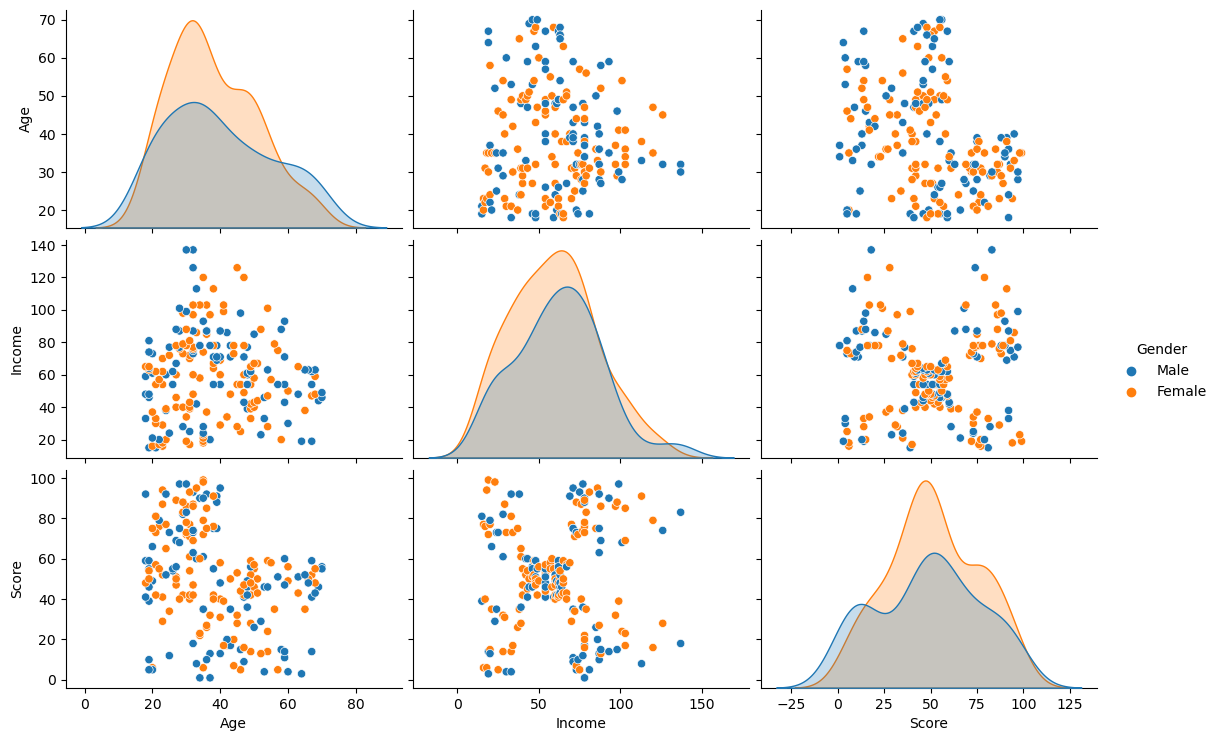

In [48]:
import matplotlib.pyplot as plt
import seaborn as sn

sn.pairplot(df, hue='Gender', aspect=1.5)
plt.show()

We conclude that gender is not important and can be removed from data

In [49]:
X = df.drop(['Gender'], axis=1)
X.head()

,Age,Income,Score
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40


We will use the KMeans clustering algorithm, which decomposes the dataframe into groups of objects that are very similar to each other and dissimilar to the objects in other groups. As a result, we also obtain a representative object for each group, which is the object most similar to the others.

This algorithm takes the number of desired groups (k) as a parameter. Lets try with k=3

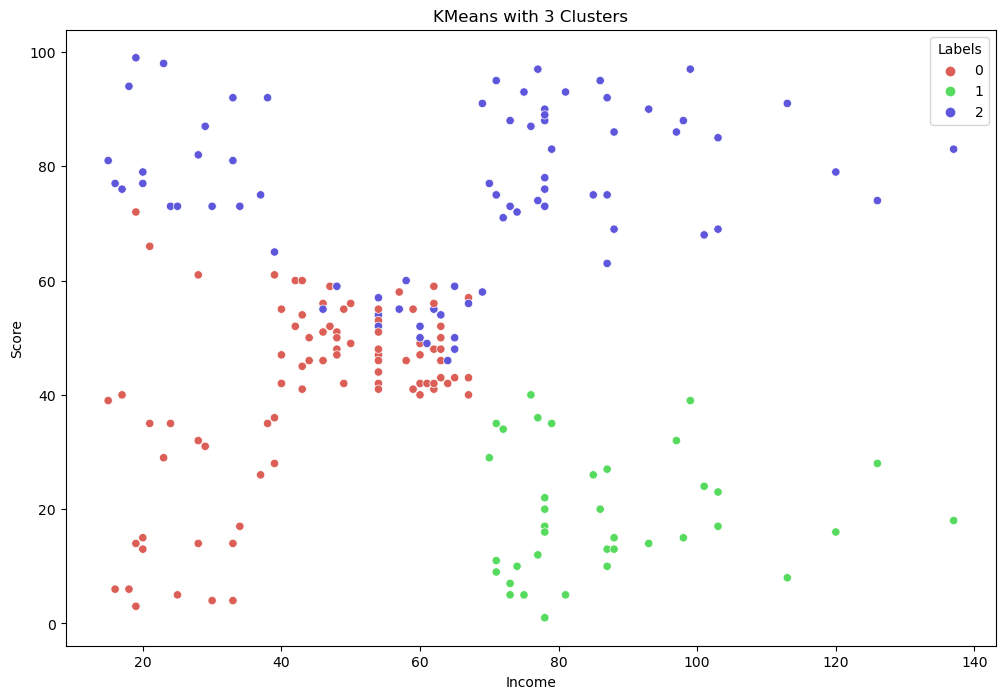

In [50]:
from sklearn.cluster import KMeans

km3 = KMeans(n_clusters=3, n_init="auto", random_state=314).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sn.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], 
                palette=sn.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

Lets test what happen with k values from  2 to 10

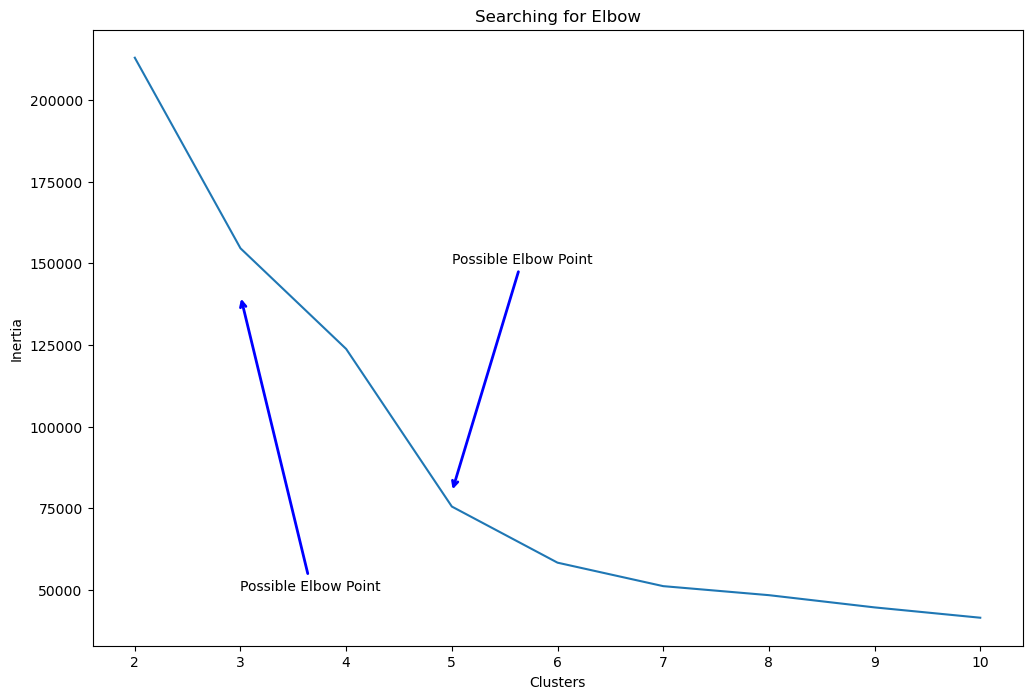

In [51]:
clusters = []

for i in range(2, 11):
    km = KMeans(n_clusters=i, n_init="auto", random_state=314).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sn.lineplot(x=list(range(2, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

So, lets test with k = 5.

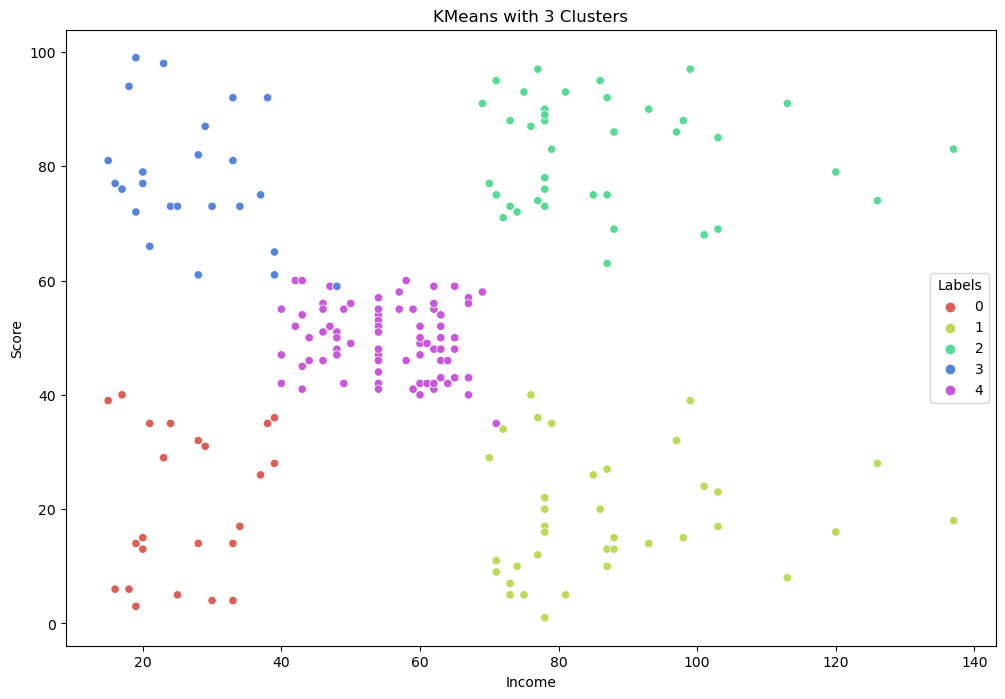

In [52]:
km5 = KMeans(n_clusters=5, n_init="auto", random_state=314).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sn.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], 
                palette=sn.color_palette('hls', 5))
plt.title('KMeans with 3 Clusters')
plt.show()

The results with k=5 are better that with k=3. 

**Note** the highly subjective nature of this evaluation, as unlike previous examples, here we do not have prior knowledge to perform an objective evaluation.

The 5 obtained clusters can be explained as follows:

    Label 0: high income and low expenses
    Label 1: low income and expenses
    Label 2: high income and expenses
    Label 3: average income and expenses
    Label 4: low income and high expenses

In conclusion, the client can notice that there is a segment with high income and low expenses, to which they could direct a more aggressive advertising strategy and potentially achieve good results.

Another conclusion is that there is a segment that spends more than their income, which is interesting to consider.

**This type of machine learning task is known as clustering**

## Conclusion
- In regular programming, we provide the algorithm or formula to transform the inputs in outputs
- In machine learning, we prodide examples of inputs and its corresponding outputs, and make the algorithms to figure out a good model for doing the transformation
    - There are different models for performing each task
    - Every model has different parameters that impacts the quality of the results
    - Selecting the best option is a combination of experience and a trial-and-error strategy.